## Find optimal number of clusters and visualize them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data

In [63]:
iris = pd.read_csv('Iris.csv')


In [65]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
data = iris.drop(['Species','Id'], axis=1)

In [69]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
target = iris['Species']

target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Data Analysis

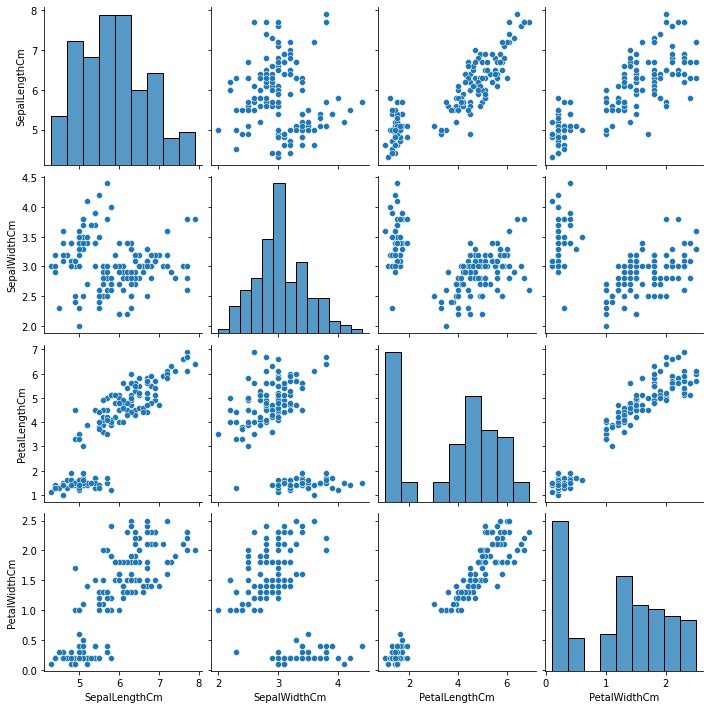

In [72]:
sns.pairplot(data)

## Deciding optimim number of clusters

### Elbow Method with KMeans

In [19]:
from sklearn.cluster import KMeans

In [25]:
inertia = []

In [26]:
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


Text(0.5, 0, 'Clusters')

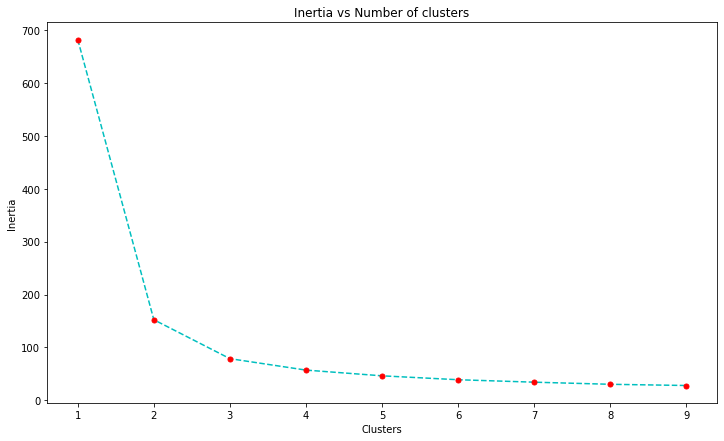

In [27]:
plt.figure(figsize = (12,7))
plt.plot(range(1,10), inertia, marker = 'o', markerfacecolor = 'red', markersize=5, markeredgecolor='red', linestyle = '--', color = 'c')
plt.title('Inertia vs Number of clusters')
plt.ylabel('Inertia')
plt.xlabel('Clusters')

#### According to this method 3 clusters seems to be the best option, as the slope sees significant change at 3

### Silhouette method using KMeans

In [28]:
sil_score = []

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    sil_score.append(silhouette_score(data, kmeans.labels_))

Text(0.5, 0, 'Clusters')

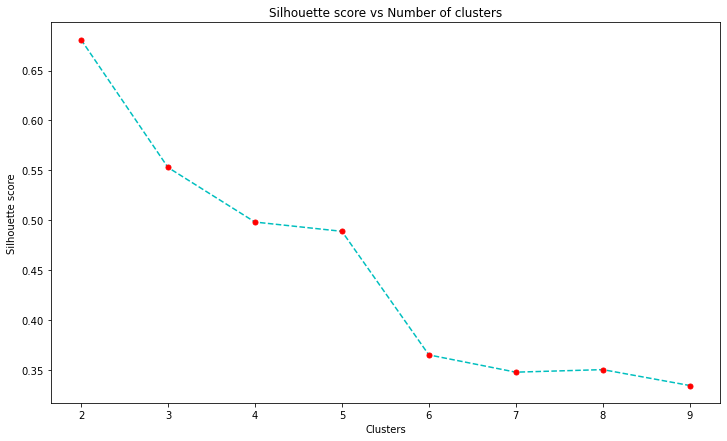

In [31]:
plt.figure(figsize = (12,7))
plt.plot(range(2,10), sil_score , marker = 'o', markerfacecolor = 'red', markersize=5, markeredgecolor='red', linestyle = '--', color = 'c')
plt.title('Silhouette score vs Number of clusters')
plt.ylabel('Silhouette score')
plt.xlabel('Clusters')

#### According to this score the optimum number of clusters is 2 

### Using Bayesian information criterian in Gaussian mixture

In [32]:
from sklearn.mixture import GaussianMixture
n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']


In [33]:
bic_score=[]
for n_comp in n_components:
    gmm=GaussianMixture(n_components=n_comp,covariance_type= 'tied')
    gmm.fit(data)
    bic_score.append(gmm.bic(data))

Text(0.5, 0, 'Clusters')

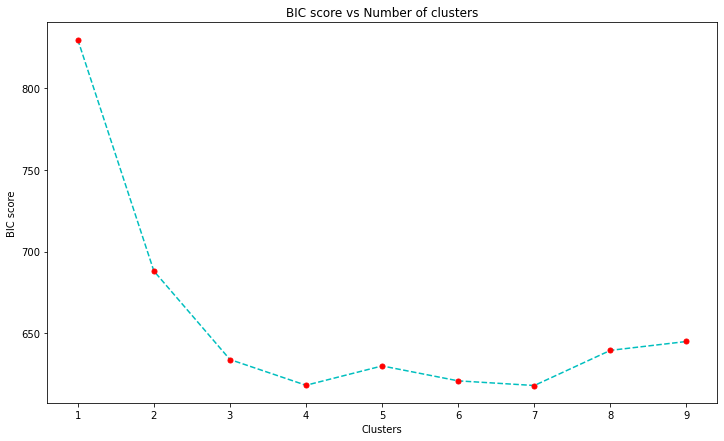

In [34]:
plt.figure(figsize = (12,7))
plt.plot(range(1,10), bic_score , marker = 'o', markerfacecolor = 'red', markersize=5, markeredgecolor='red', linestyle = '--', color = 'c')
plt.title('BIC score vs Number of clusters')
plt.ylabel('BIC score')
plt.xlabel('Clusters')


## Hierarchical clustering

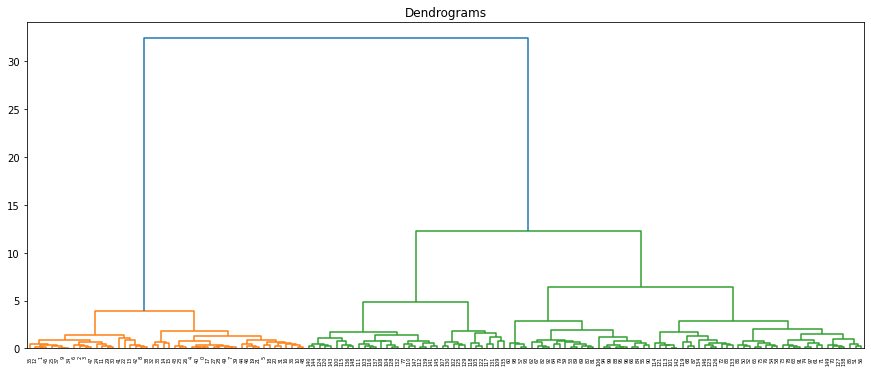

In [73]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 6))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

#### This method shows two very distinct clusters of irises but there are two clusters in second cluster though not very different from each other. 

## Results
1. Elbow method : optimum 3 clusters
2. Silhouette coeffitient : optimum two clusters
3. BIC score : 4 clusters
4. Hierarchical clustering : 3 distinguishable clusters, although two of them are pretty similar.

## Conclusion

Best option would be two select 3 clusters as it is a majority in results and can be seen in dendogram clearly even if two are very similar there is still a significant difference.

## Visualization of results

In [74]:
kmeans = KMeans(n_clusters = 3)
predictions = kmeans.fit_predict(data)

In [75]:
pred = pd.DataFrame(predictions, columns = ['Clusters'], index= range(0,150))

In [76]:
new_results = pd.concat([data, pred], axis=1)

In [77]:
new_results

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [85]:
new_results.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Text(0.5, 1.0, 'Predicted Clusters')

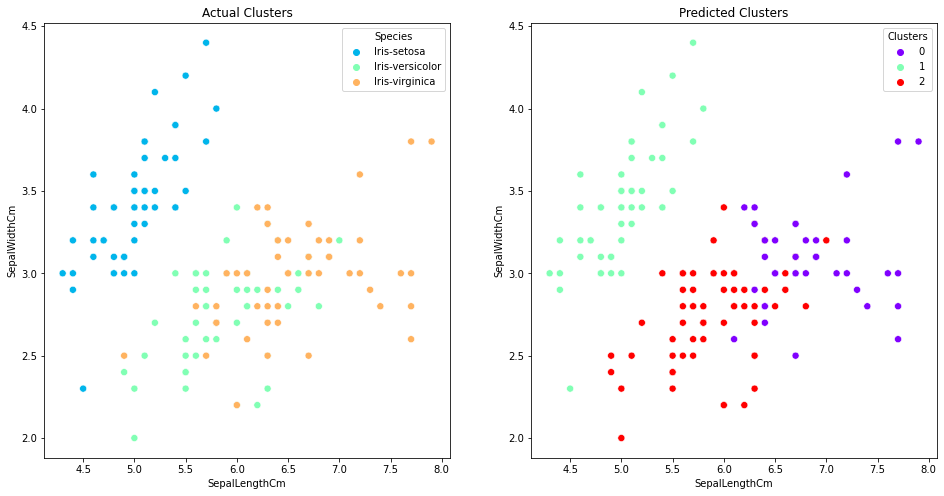

In [90]:
f, axes = plt.subplots(1, 2, figsize=(16,8), sharex=True)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris, hue = 'Species', ax = axes[0], palette='rainbow', s=50)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = new_results, hue = 'Clusters', ax = axes[1], palette='rainbow', s=50)
axes[0].set_title('Actual Clusters')
axes[1].set_title('Predicted Clusters')

Text(0.5, 1.0, 'Predicted Clusters')

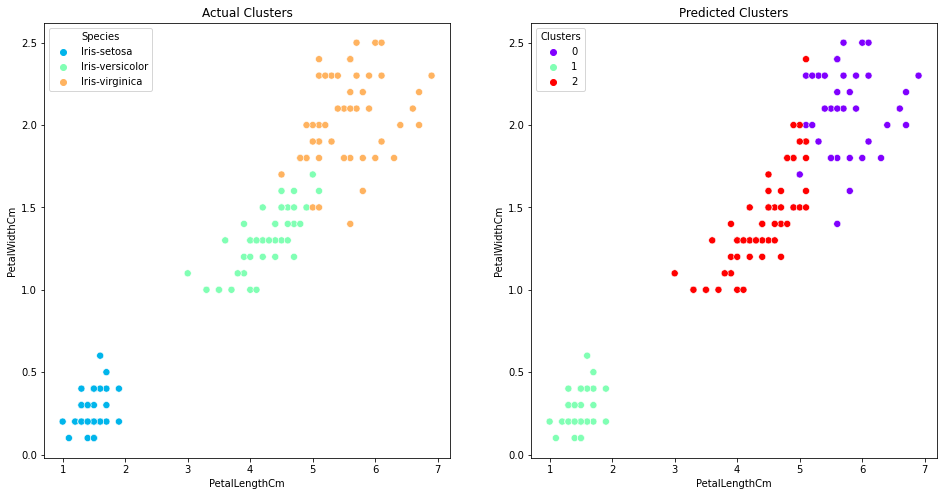

In [89]:
f, axes = plt.subplots(1, 2, figsize=(16,8), sharex=True)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris, hue = 'Species', ax = axes[0], palette='rainbow', s=50)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = new_results, hue = 'Clusters', ax = axes[1], palette='rainbow', s=50)
axes[0].set_title('Actual Clusters')
axes[1].set_title('Predicted Clusters')